In [2]:
import numpy as np
import keras
import tensorflow as tf



In [3]:
#import dataset 

#training
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/dl/butterfly/train",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 9285 files belonging to 75 classes.


In [4]:
#testing
test_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/dl/butterfly/test",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 375 files belonging to 75 classes.


In [5]:
#validating
valid_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/dl/butterfly/valid",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 375 files belonging to 75 classes.


In [6]:
train_ds.class_names

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ATALA',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BECKERS WHITE',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREY HAIRSTREAK',
 'INDRA SWALLOW',
 'IPHICLUS SISTER',
 'JULIA',
 'LARGE MARBLE',
 'MALACHITE',
 'MANGROVE SKIPPER',
 'MESTRA',
 'METALMARK',
 'MILBERTS TORTOISESHELL',
 'MONARCH',
 'MOURNING CLOAK',
 'ORANGE OAKLEAF',
 'ORANGE TIP',
 'ORCHARD SWALLOW',
 'PAINTED LADY',
 'PAPER KITE',
 'PEACOCK',
 'PINE WHITE',
 'PIPEVINE SWALLOW',
 'POPINJAY',
 'PURPLE HAIRS

In [7]:
folders = len(train_ds.class_names)
folders

75

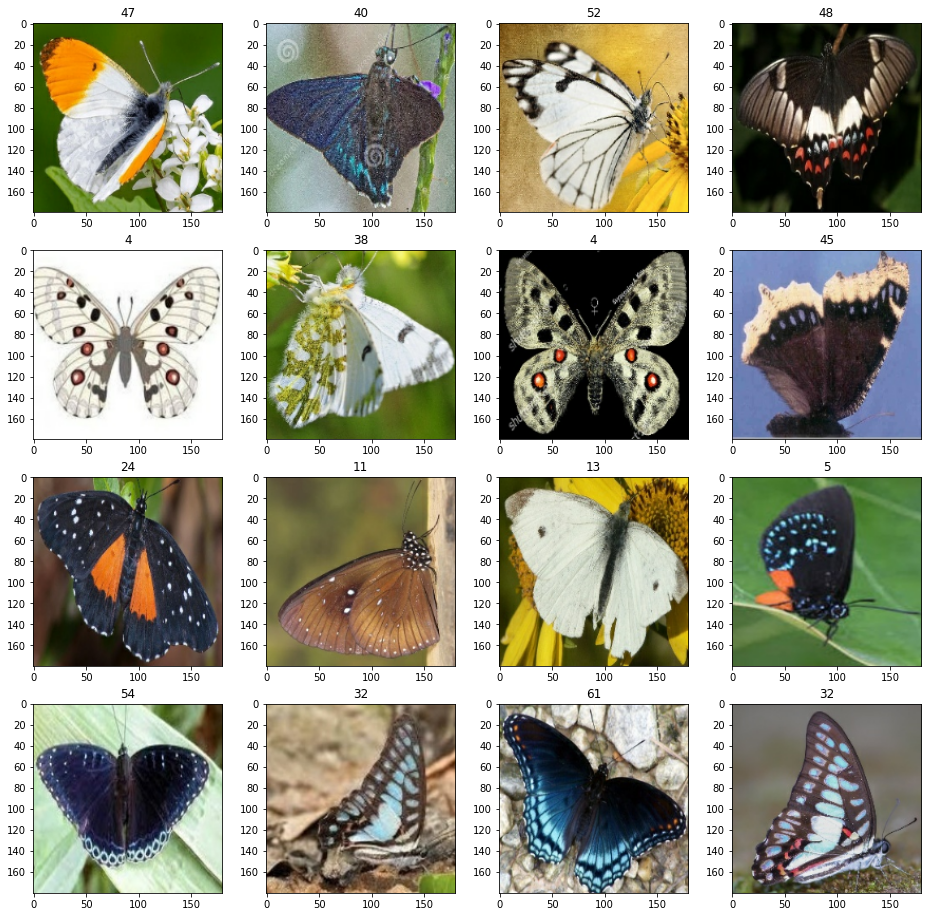

In [8]:
#visualize 
import matplotlib.pyplot as plt
plt.figure(figsize =(16,16))
for img,labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img[i].numpy().astype("int"))
    plt.title(int(labels[i]))



In [9]:
#MODEL BUILDING USING TRANSFER LEARNING
from keras.applications import vgg19

In [10]:
model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    classes=folders,
    input_shape = ([180,180]+[3])
)

In [11]:
#Freeze model
for layers in model.layers:
  layers.trainable = False

In [12]:
#adding layers at the end for our output
from keras.layers import Dense,Flatten
x = Flatten()(model.output)
prediction = Dense(folders,activation = 'softmax')(x)



In [13]:
#creating model based on pre_model
from keras.models import Model
model = Model(inputs = model.input,outputs = prediction)

In [14]:
#compile model


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')

In [17]:
#fit model on our Data
model.fit(train_ds,batch_size=15,epochs =100,validation_data=valid_ds)

Epoch 1/100
291/291 [==============================] - 43s 148ms/step - loss: 1.5496 - accuracy: 0.9582 - val_loss: 9.1017 - val_accuracy: 0.8560
Epoch 2/100
291/291 [==============================] - 43s 146ms/step - loss: 1.6948 - accuracy: 0.9598 - val_loss: 10.1400 - val_accuracy: 0.8613
Epoch 3/100
291/291 [==============================] - 43s 147ms/step - loss: 1.5202 - accuracy: 0.9646 - val_loss: 11.6560 - val_accuracy: 0.8720
Epoch 4/100
291/291 [==============================] - 43s 147ms/step - loss: 1.4267 - accuracy: 0.9683 - val_loss: 12.9537 - val_accuracy: 0.8667
Epoch 5/100
291/291 [==============================] - 43s 147ms/step - loss: 1.1057 - accuracy: 0.9737 - val_loss: 11.3424 - val_accuracy: 0.8853
Epoch 6/100
291/291 [==============================] - 43s 147ms/step - loss: 1.1927 - accuracy: 0.9757 - val_loss: 12.8105 - val_accuracy: 0.8773
Epoch 7/100
291/291 [==============================] - 43s 146ms/step - loss: 0.9589 - accuracy: 0.9787 - val_loss: 13.

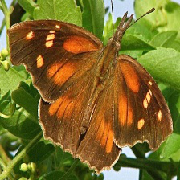

In [57]:
#lets check our model to providing an image to it 
from PIL import Image
#import an image
image_path = "/content/drive/MyDrive/dl/butterfly/test/AMERICAN SNOOT/1.jpg"
img = tf.keras.preprocessing.image.load_img(image_path,target_size=(180,180))
img

In [58]:
input_arr = tf.keras.preprocessing.image.img_to_array(img)

In [59]:
# Convert single image to a batch.
input_arr = np.array([input_arr]) 

In [60]:
predictions = model.predict(input_arr)

In [61]:
np.argmax(predictions[0])

2

In [71]:
class_name[2]

'AMERICAN SNOOT'

model.save("/content/drive/MyDrive/dl/butterfly")

In [74]:
image_path = input([])


/content/drive/MyDrive/dl/butterfly/test/QUESTION MARK/1.jpg


In [80]:
img = tf.keras.preprocessing.image.load_img(image_path,target_size=(180,180))
input_arr = tf.keras.preprocessing.image.img_to_array(img)
# Convert single image to a batch.
input_arr = np.array([input_arr]) 
predictions = model.predict(input_arr)
val = np.argmax(predictions[0])
class_name[val]


'QUESTION MARK'

In [67]:
folders

75

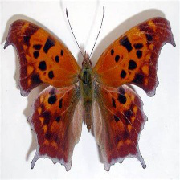

In [77]:
img

In [70]:
class_name = train_ds.class_names
class_name[0]

'ADONIS'